# 0. Install Dependencies and Bring in Data

In [1]:
# !pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
df = pd.read_csv(os.path.join('Datasets/jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
len(df)

159571

In [6]:
tf.__version__

'2.16.1'

# 1. Preprocess

In [7]:
# !pip list

In [8]:
from tensorflow.keras.layers import TextVectorization

In [9]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [10]:
MAX_FEATURES = 200000 # number of words in the vocab

In [11]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [12]:
vectorizer.adapt(X.values)

In [13]:
vectorized_text = vectorizer(X.values)

In [14]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [15]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# 2. Create Sequential Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [17]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [18]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4434s 634ms/step - loss: 0.0839 - val_loss: 0.0479
Epoch 2/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3989s 571ms/step - loss: 0.0471 - val_loss: 0.0409
Epoch 3/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4019s 576ms/step - loss: 0.0406 - val_loss: 0.0365
Epoch 4/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4060s 582ms/step - loss: 0.0368 - val_loss: 0.0338
Epoch 5/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4048s 580ms/step - loss: 0.0326 - val_loss: 0.0292
Epoch 6/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4021s 576ms/step - loss: 0.0298 - val_loss: 0.0261
Epoch 7/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4002s 573ms/step - loss: 0.0264 - val_loss: 0.0235
Epoch 8/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3988s 571ms/step - loss: 0.0236 - val_loss: 0.0211
Epoch 9/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4004s 573ms/step - loss: 0.0220 - val_loss: 0.0185
Epoch 10/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4034s 578ms/step - loss: 0.0195 - val_loss: 0.0169
Epoch 11/20
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3850s 552ms/step - loss: 0

In [21]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

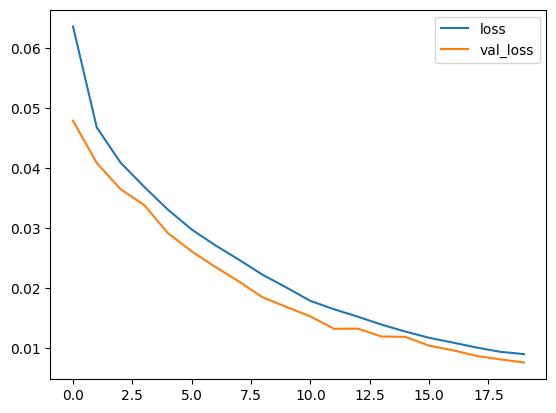

In [22]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [23]:
input_text = 'You freaking suck! I am going to hit you.'

In [24]:
vectorized_input = vectorizer(input_text)  # This will have shape (1, sequence_length)

# Add the embedding dimension (1 in this case since we have a single input)
vectorized_input = np.expand_dims(vectorized_input, axis=-1)  # Shape: (1, sequence_length, 1)

# Make predictions
res = model.predict(vectorized_input)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [25]:
res

array([[8.9577574e-01, 4.2084086e-04, 7.2689271e-03, 1.9485552e-03,
        1.9456584e-02, 1.2034557e-03],
       [8.2933998e-01, 8.0353245e-02, 1.3876925e-01, 1.5066975e-02,
        3.2921991e-01, 2.5894631e-02],
       [9.9808103e-01, 3.8147998e-01, 9.7126061e-01, 7.0106899e-03,
        7.5884694e-01, 3.0899661e-02],
       ...,
       [1.8156415e-02, 1.1002126e-18, 2.5061026e-05, 4.3062229e-09,
        2.1367554e-04, 4.7778258e-08],
       [1.8156400e-02, 1.1002041e-18, 2.5061026e-05, 4.3062229e-09,
        2.1367533e-04, 4.7778258e-08],
       [1.8156400e-02, 1.1002041e-18, 2.5061026e-05, 4.3062229e-09,
        2.1367533e-04, 4.7778258e-08]], dtype=float32)

In [26]:
(res > 0.5).astype(int)

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [27]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [28]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


array([[1, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [29]:
res.shape

(1800, 6)

# 4. Evaluate Model

In [30]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [33]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9567830562591553, Recall:0.9636783003807068, Accuracy:0.4964894652366638


# 5. Test and Gradio

In [34]:
# !pip install gradio jinja2

In [35]:
import tensorflow as tf
import gradio as gr

c:\Users\KNYpe\Downloads\CommentToxicity-main\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
model.save('Models/toxicityy.h5')

In [37]:
model = tf.keras.models.load_model('Models/toxicityy.h5')

In [38]:
input_str = vectorizer('hey i freaken hate you!')

In [39]:
res = model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step


In [40]:
res

array([[9.4334257e-01, 2.4241491e-04, 4.7652638e-03, 2.2618946e-04,
        6.2318679e-02, 1.2539692e-03]], dtype=float32)

In [48]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {} ||||||||||| '.format(col, results[0][idx]>0.5)
    
    return text

In [42]:
# interface = gr.Interface(fn=score_comment, 
#                          inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
#                         outputs='text')

In [43]:
# interface.launch(share=True)

In [49]:
score_comment("You are a freaking idiot! I hate you!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


'toxic: True ||||||||||| severe_toxic: False ||||||||||| obscene: True ||||||||||| threat: False ||||||||||| insult: True ||||||||||| identity_hate: False ||||||||||| '

In [50]:
score_comment("You are a great person! I love you!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


'toxic: False ||||||||||| severe_toxic: False ||||||||||| obscene: False ||||||||||| threat: False ||||||||||| insult: False ||||||||||| identity_hate: False ||||||||||| '